In [ ]:
"""
SELECT level_index, matrix
  FROM playthroughs
  WHERE level_index>100
  INTO OUTFILE 'C:/ProgramData/MySQL/MySQL Server 8.0/Uploads/offdiags.txt';
"""

In [15]:
import pandas as pd
import networkx as nx
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import math

0.3816000165980834 [0.11660017 0.80410015]
0.00019480500000000004 5.00726999999999e-06 0.06677299999999996


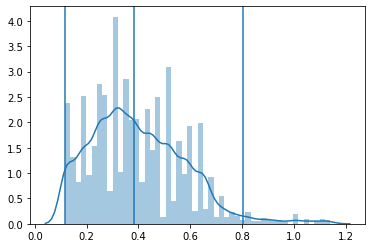

In [27]:
from collections import defaultdict

def unnormalise(val, minval, maxval):
    logmin = math.log(minval)
    logmax = math.log(maxval)
    return (math.log(val) - logmin) / (logmax - logmin)

def normalise(val, minval, maxval):
    return (minval ** (1-val)) * (maxval ** val);

offdiags = defaultdict(list)
with open('offdiags.txt') as f:
    for line in f:
        lid,matrix = line.split('\t')
        lid = int(lid)

        if len(matrix.split(':')) != 3:
            continue

        A,b,x = matrix.split(':')
        
        for row, data in enumerate(A.split(';')):
            for col, datum in enumerate(data.split(',')):
                val = float(datum)
                if row!=col and val < 0:
                    norm = unnormalise(-val, 1e-6, 1)
                    offdiags[lid].append(norm)

dist = np.concatenate((offdiags[101], offdiags[102], offdiags[103]))
sns.distplot(dist)

med = np.median(dist)
conf = np.percentile(dist, [2.5,97.5])
print(med, conf)
print(normalise(med, 1e-6,1), normalise(conf[0], 1e-6,1), normalise(conf[1], 1e-6,1))
plt.axvline(med)
plt.axvline(conf[0])
plt.axvline(conf[1])